# Fig9. Relative weight of each department in the nine main research centres. To favour comparison, each group of values is stacked at 100%. 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import matplotlib as mpl


plt.style.use('seaborn-muted')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_investigadores.csv"

#### Define function to clean data

In [3]:
def translate(dataframe, column_to_translate, translations_filename):    
    translations_df = pd.read_csv(f"data/{translations_filename}")
    translations_df.columns=["organismo", "acronimo"]
    translations_df['organismo'] = translations_df['organismo'].str.upper()
    translations_df['organismo'] = translations_df['organismo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    dataframe[column_to_translate] = dataframe[column_to_translate].str.upper()
    dataframe[column_to_translate] = dataframe[column_to_translate].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df_def = pd.merge(dataframe, translations_df, on=column_to_translate, how='inner')
    return df_def

In [4]:
def prepare_data(data, num_of_centres):
    data = read_csv(file_path)
    data = data[data["Universidad"] != 0]
    data = data[data["Departamento / Centro"] != 0]
    mini = data[["ID investigador", "Universidad", "Departamento / Centro"]]
    mini.columns = ["id", "uni", "dpto"]
    mini = mini.drop_duplicates(subset ="id", keep = "first").reset_index(drop=True)
    # mini = translate(mini, "uni", "universidades.csv")
    uni_df = mini.groupby("uni").agg({'id': 'count'})
    uni_list = uni_df.nlargest(num_of_centres, "id").index.tolist()
    grp = mini.groupby(['uni', 'dpto']).agg({'id': 'count'})
    grp_pcts = grp.groupby(level=0).apply(lambda x: x / float(x.sum())).sort_values(['id'], ascending=False)
    # display(grp_pcts.loc[grp_pcts["organismo"].str.contains('UNIVERSIDAD COMPLUTENSE')])
    # df_def = translate(grp_pcts, "organismo", "universidades.csv")
    # result_df = grp_pcts.loc[grp_pcts["uni"].isin(uni_list)]
    result = grp_pcts[grp_pcts.index.isin(uni_list, level="uni")]
    result = result.reindex(uni_list, level="uni")
    unstacked = result.unstack()
    return unstacked# .sort_values(by='id', ascending=False)

#### Run program
## Change 'num_of_centres' to show as many centres as you want'

In [5]:
num_of_centres = 9
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos, num_of_centres)

#### Print graph

<Figure size 432x288 with 0 Axes>

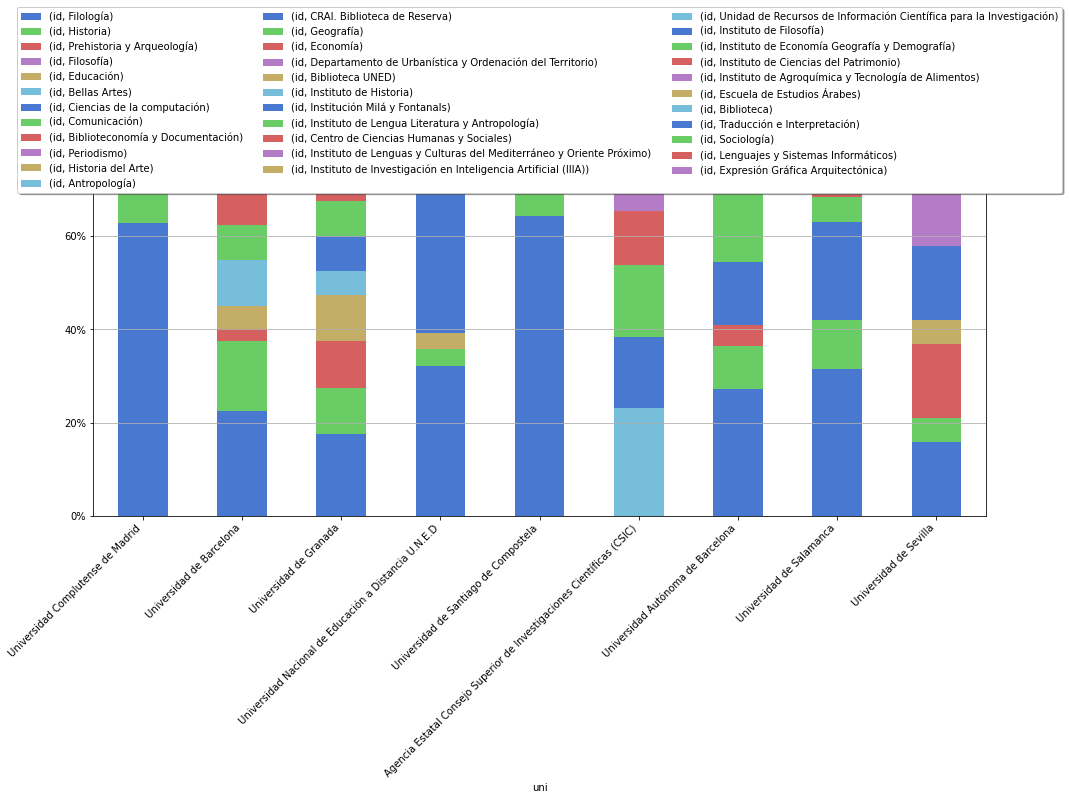

In [13]:
plt.figure()
ax1 = df2.plot(stacked=True, kind="bar", figsize=(16,9))
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1,decimals=0))
plt.grid(axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
# Shrink current axis's height by 10% on the bottom
box = ax1.get_position()
# ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.show()

In [8]:
df2

id            \
dpto                                               Filología  Historia   
uni                                                                      
Universidad Complutense de Madrid                   0.629032  0.064516   
Universidad de Barcelona                            0.225000  0.150000   
Universidad de Granada                              0.175000  0.100000   
Universidad Nacional de Educación a Distancia U...  0.321429  0.035714   
Universidad de Santiago de Compostela               0.642857  0.071429   
Agencia Estatal Consejo Superior de Investigaci...       NaN       NaN   
Universidad Autónoma de Barcelona                   0.272727  0.090909   
Universidad de Salamanca                            0.315789  0.105263   
Universidad de Sevilla                              0.157895  0.052632   

                                                                              \
dpto                                               Prehistoria y Arqueología   
uni                                                                            
Universidad Complutense de Madrid                                   0.048387   
Universidad de Barcelona                                            0.025000   
Universidad de Granada                                              0.100000   
Universidad Nacional de Educación a Distancia U...                       NaN   
Universidad de Santiago de Compostela                               0.035714   
Agencia Estatal Consejo Superior de Investigaci...                       NaN   
Universidad Autónoma de Barcelona                                   0.045455   
Universidad de Salamanca                                                 NaN   
Universidad de Sevilla                                              0.157895   

                                                                        \
dpto                                               Filosofía Educación   
uni                                                                      
Universidad Complutense de Madrid                   0.048387  0.048387   
Universidad de Barcelona                                 NaN  0.050000   
Universidad de Granada                                   NaN  0.100000   
Universidad Nacional de Educación a Distancia U...       NaN  0.035714   
Universidad de Santiago de Compostela               0.035714  0.071429   
Agencia Estatal Consejo Superior de Investigaci...       NaN       NaN   
Universidad Autónoma de Barcelona                        NaN       NaN   
Universidad de Salamanca                                 NaN       NaN   
Universidad de Sevilla                                   NaN  0.052632   

                                                                 \
dpto                                               Bellas Artes   
uni                                                               
Universidad Complutense de Madrid                      0.048387   
Universidad de Barcelona                               0.100000   
Universidad de Granada                                 0.050000   
Universidad Nacional de Educación a Distancia U...          NaN   
Universidad de Santiago de Compostela                       NaN   
Agencia Estatal Consejo Superior de Investigaci...          NaN   
Universidad Autónoma de Barcelona                           NaN   
Universidad de Salamanca                                    NaN   
Universidad de Sevilla                                      NaN   

                                                                               \
dpto                                               Ciencias de la computación   
uni                                                                             
Universidad Complutense de Madrid                                    0.032258   
Universidad de Barcelona                                                  NaN   
Universidad de Granada                                               0.075000   
Universidad Nacional de Educ